# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 2

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **26 февраля в 22:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

In [237]:
import numpy as np
import scipy.stats as sps
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

import warnings
warnings.filterwarnings('ignore')

## Задача 1.

Рассмотрим данные исследования 2004 года о зависимости риска развития диабета от пола, возраста, индекса массы тела, среднего кровяного давления и других показателей. 

Функция `sklearn.datasets.load_diabetes()` возвращает словарь. В поле `data` записана матрица регрессоров, в которой данные предварительно центрированы и нормированы. В поле `target` записана мера прогрессирования заболевания в течении года. В поле `DESCR` можно прочитать подробнее о данных.

### Загрузка данных

In [238]:
data = load_diabetes()

Посмотрим на описание датасета.

In [239]:
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

Поле `data` содержит матрицу размера 442 $\times$ 10, где 442 — количество пациентов, а 10 — количество признаков (возраст, пол, и т.д.). 
Строки матрицы соответствуют пациентам, столбцы — признакам.

In [240]:
data['data'].shape

(442, 10)

Целевая переменная $-$ мера прогрессирования заболевания в течении года.


In [241]:
data['target'].shape

(442,)

Создайте матрицу регрессоров $X$ и столбец наблюдений $y$.

In [242]:
X, y = data['data'], data['target']

### Обучение моделей

Разбейте данные случайно на две части — обучающую и тестовую в соотношении 80:20.

Если что-то забыли или что-то не понятно, можно почитать справку:

In [243]:
train_test_split?

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


Заведите модель линейной регрессии из `sklearn` и обучите ее по обучающей части данных.

In [245]:
model = LinearRegression()
model.fit(X_train, y_train)

None

Выведите кооэффициенты модели, включая свободный член.

In [246]:
print(model.coef_, model.intercept_)

[  35.48730021 -220.63362256  561.40428387  337.06225983 -480.32240403
  157.08745502   17.26075025  156.3209493   656.0967599    82.20214331] 151.0805962158521


Посчитайте предсказания построенной модели на тестовой выборке

In [247]:
y_pred = model.predict(X_test)

Реализуйте метрики MSE, MAE, MAPE без использования `sklearn` и других готовых реализаций.

In [248]:
def mean_squared_error(y_true, y_pred):
    return np.sum(np.square(y_true - y_pred))/y_true.shape[0]

def mean_absolute_error(y_true, y_pred):
    return np.sum(np.absolute(y_true - y_pred))/y_true.shape[0]

def mean_absolute_percentage_error(y_true, y_pred):
    return np.sum(np.absolute((y_true - y_pred)/(y_true)))*100

Посчитайте MSE, MAE, MAPE на тестовой выборке и выведите с точностью до трех знаков после запятой.

In [249]:
print("%.3f"%mean_squared_error(y_test, y_pred))

print("%.3f"%mean_absolute_error(y_test, y_pred))

print("%.3f"%mean_absolute_percentage_error(y_test, y_pred))

3458.394
46.070
3415.372


Постройте графики зависимости предсказания прогрессирования заболевания от различных признаков по отдельности. При работе с конкретным признаком полагайте значения остальных признаков равными средним значениям этих признаков на тестовой выборке.

Все графики нарисуйте в одном окне.


*Может помочь следующий код:*

`
copies = np.tile(a, k).reshape((k, -len(a))) 
` *создает $k$ копий массива `a` размера (`len(a)`, ).* 
*Размер полученной матрицы $k \times len(a)$.*

*Также рекомендуется изучить ноутбуки с занятий.*





### Своя реализация модели

Теперь реализуем линейную регрессию самостоятельно, используя формулы с лекции.
Вам нужно только заполнить прочерки в методах `fit` и `predict`.

In [250]:
class MyLinearRegression:
    """
    Класс, реализующий линейную регрессию c помощью МНК.
    """
    
    def __init__(self):
        pass
        
    def fit(self, X, Y):
        """
        Функция обучения модели. 
        
        Предполагается модель Y = X * theta + epsilon. 
        где X --- регрессор (матрица размера n x d), 
        Y --- отклик (матрица размера n x 1),
        epsilon-ы имеют нормальное распределение

        Обратите внимание, здесь нет intercept_
        """
        
        self.n, self.d = X.shape
        
        self.theta = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(), X)), X.transpose()), Y)
  
        return self
    
        
    def predict(self, X):
        """
        Возвращает предсказание отклика на новых объектах X 
        и опционально доверительный/предсказательный интервал.
        
        X --- матрица объектов размера n x d
                        
        """
        
        y_pred = np.dot(X, self.theta)
        return y_pred

Обучите вашу модель на данных о диабете с добавлением свободного члена.
Распечатайте коэффициенты и сравните их с коэффициентами модели из `sklearn`.

In [251]:
my = MyLinearRegression()

a = np.ones(X_train.shape[0])

nX_train = np.column_stack((X_train, a))

my.fit(nX_train, y_train)
my.__dict__['theta']

array([  35.48730021, -220.63362256,  561.40428387,  337.06225983,
       -480.32240403,  157.08745502,   17.26075025,  156.3209493 ,
        656.0967599 ,   82.20214331,  151.08059622])

Теперь обучите модель без свободного члена.

In [252]:
my_without_intersect = MyLinearRegression()

my_without_intersect.fit(X_train, y_train)
my_without_intersect.__dict__['theta']

array([  -55.736688  ,  -179.14850512,   482.5715038 ,   392.37240728,
       -1098.78734442,   785.02210646,    51.14793145,   -53.81981082,
         940.35578008,   206.98983325])

Сравните качество моделей со свободным членом и без него на тестовой выборке.

In [253]:
a = np.ones(X_test.shape[0])
nX_test = np.column_stack((X_test, a))

print("MSE with intersect:%.3f"%mean_squared_error(y_test, my.predict(nX_test)), "\t",
      "MSE without intersect:%.3f"%mean_squared_error(y_test, my_without_intersect.predict(X_test)))

print("MAE with intersect:%.3f"%mean_absolute_error(y_test, my.predict(nX_test)), "\t",
      "MAE without intersect:%.3f"%mean_absolute_error(y_test, my_without_intersect.predict(X_test)))

print("MAPE with intersect:%.3f"%mean_absolute_percentage_error(y_test, my.predict(nX_test)), "\t",
      "MAPE without intersect:%.3f"%mean_absolute_percentage_error(y_test, my_without_intersect.predict(X_test)))

MSE with intersect:3458.394 	 MSE without intersect:28673.612
MAE with intersect:46.070 	 MAE without intersect:159.008
MAPE with intersect:3415.372 	 MAPE without intersect:11173.375


Сделайте выводы.

**Вывод:** 

Модель со свободным членом показывает результат лучше, чем без. Возможно, это происходит потому что с добавлением свободного члена у нас больше "вариантов выбора" из все возможных параметров $\theta$.

## Задача 2.

### Часть 1

Скачайте [датасет](https://www.kaggle.com/deepu1109/star-dataset) и распакуйте. Вы получите файл `6 class csv.csv`. 
Он представляет собой таблицу некоторых характеристик звезд, таких как температура, радиус и т.д..
В описании к датасету указаны следующие типы звезд:
* Brown Dwarf (0),
* Red Dwarf (1),
* White Dwarf (2),
* Main Sequence (3),
* Supergiant (4),
* Hypergiant (5).

На основании характеристик мы хотим классифицировать звезды по типу. 


In [281]:
data = pd.read_csv("6 class csv.csv")
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [282]:
data.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

Для классификации с помощью kNN будем использовать только столбцы с числовыми значениями. 
Целевая переменная (класс) находится в столбце Star type.

Разделите данные на признаки $X$ и целевую переменную $y$.

In [283]:
needed_columns = [
    'Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'
]
       
X = data[needed_columns]
y = data['Star type']

Разделите данные на тренировочную и тестовую выборки, `test_size` возьмите равным 0.3.

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Заведите модель классификатора kNN из `sklearn`, параметр `n_neighbours` возьмите по умолчанию. Обучите модель на тренировочной выборке

In [285]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

None

Реализуйте метрику accuracy без использования `sklearn` и других ее готовых реализаций.

In [286]:
def accuracy_score(y_true, y_pred):
    res = y_true == y_pred
    return res.sum()/res.shape[0]

Посчитайте метрику качества по тренировочной и тестовой выборкам и выведите эти значения с точностью 4 знака после запятой.

In [287]:
#accuracy_score по train
print("%.4f"%accuracy_score(y_train, model.predict(X_train)))

#accuracy_score по test
print("%.4f"%accuracy_score(y_test, model.predict(X_test)))

0.7976
0.6111


#### Нормализация данных

Разные столбцы могут иметь разную величину значений. Из-за этого близость по одной координате может "значить" больше, чем близость по другой. Иногда разная значимость признаков может быть оправдана, но в данном случае попробуем нормализовать данные. Для этого воспользуемся  [`sklearn.preprocessing.StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [288]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_, scaler.scale_

(array([1.10518274e+04, 9.54668664e+04, 2.18338483e+02, 4.87721429e+00]),
 array([1.00029539e+04, 1.59395928e+05, 5.07477063e+02, 1.04658019e+01]))

Преобразуйте даннные с помощью Scaler-a.

In [289]:
X_train_scaled = scaler.transform(X_train)

scaler_test = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler_test.transform(X_test)

Обучите новый классификатор kNN на преобразованных данных.

In [290]:
model_scaled = KNeighborsClassifier()
model_scaled.fit(X_train_scaled, y_train)

None

Посчитайте метрику accuracy на тренировочной и тестовой выборке для новой модели.

In [292]:
print('%.4f'%accuracy_score(y_test, model_scaled.predict(X_test_scaled)))

0.9722


Сделайте выводы.

**Вывод:**

Возрасла точность. Ну это понятно, потому что метрика пространства признаков сильно подстраивалась под координаты с "большей" близостью. К примеру если мы прогнозировали цены квартиры от признаков: количество комнат и расстояние до метро(в метрах), то очевидно, что второй признак --- расстояние до метро будет преобладать в обучении над первым.

#### Обучение моделей

Теперь посмотрим, как зависит метрика качества моделей от $k$ — количества соседей.
Обучите модели для каждого $k$ из массива `ks`. Посчитайте метрику качества этих моделей на тренировочной и тестовой выборках. То же проделайте и для нормализованных данных.

In [293]:
ks = np.arange(1, 51, 2)  # различные значения k

# Создание и обучение моделей:
models = [KNeighborsClassifier(n_neighbors = k) for k in ks]  # массив моделей, элемент - одна модель

for i in models:
    i.fit(X_train, y_train)

# Подсчет метрики качества
scores = [accuracy_score(y_test, elem.predict(X_test)) for elem in models]  # массив значений метрик качества моделей 
                                     # из массива models на тестовой выборке, elem - одна модель
    
scores_train = [accuracy_score(y_train, elem.predict(X_train)) for elem in models]  # массив значений метрик качества на тренировочной выборке

models_scaled = [KNeighborsClassifier(n_neighbors = k) for k in ks]

for i in models_scaled:
    i.fit(X_train_scaled, y_train)

scores_scaled = [accuracy_score(y_test, elem.predict(X_test_scaled)) for elem in models_scaled]
scores_scaled_train = [accuracy_score(y_train, elem.predict(X_train_scaled)) for elem in models_scaled]

Теперь постройте на одном графике четыре зависимости значений метрики качества от параметра $k$. Не забудьте подписать, чему какая линия соответствует, т.е. указать тренировочная или тестовая выборка, есть или нет нормализации, а также подпишите название и оси графика.

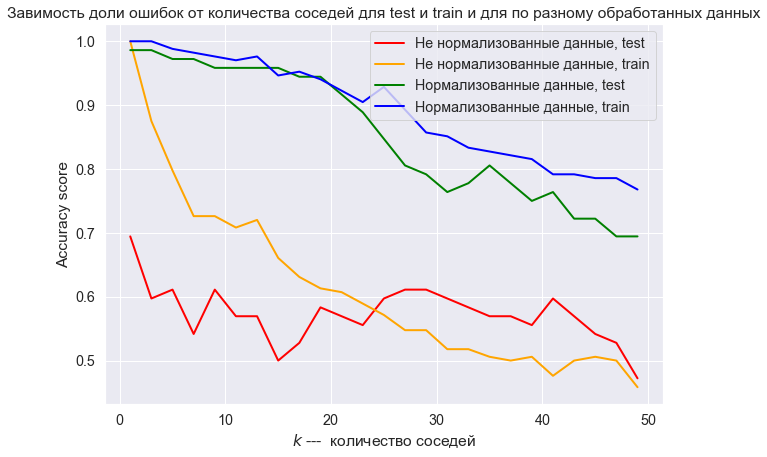

In [294]:
plt.figure(figsize=(10, 7))

plt.xlabel('$k$ ---  количество соседей')
plt.ylabel('Accuracy score')
plt.title('Завимость доли ошибок от количества соседей для test и train и для по разному обработанных данных')

plt.plot(ks, scores, linewidth = 2, label = 'Не нормализованные данные, test', color = 'red')
plt.plot(ks, scores_train, linewidth = 2, label = 'Не нормализованные данные, train', color = 'orange')
plt.plot(ks, scores_scaled, linewidth = 2, label = 'Нормализованные данные, test', color = 'green')
plt.plot(ks, scores_scaled_train, linewidth = 2, label = 'Нормализованные данные, train', color = 'blue')
plt.legend()

None

Сделайте выводы.

**Вывод**

Видно, что для нормализованных данных качество получается лучше. Также при слишком большом $k$ получается плохое качество как на *test*, так и на *train* чатей выборки. 

### Часть 2 

Теперь скачаем [датасет](https://www.kaggle.com/colearninglounge/predicting-pulsar-starintermediate) о предсказании пульсаров.





Пульсары &mdash; это космические объекты, излучающие в различных диапазонах длины волны. Согласно современным астрофизическим теориям, пульсары представляют собой вращающиеся нейтронные звезды, обладающие магнитным полем, наклоненным относительно оси вращения.

Пульсары представляют значительный научный интерес. Поэтому есть потребность в автоматическом обнаружении интересных объектов для ускорения процесса изучения. На практике почти все обнаружения вызваны радиочастотными помехами и шумом, что затрудняет поиск достоверных сигналов. В последнее время для автоматического обнаружения пульсаров начали применять машинное обучение. Актуальная задача сегодня &mdash; бинарная классификация объектов-кандидатов на предмет того, являются ли они пульсарами.

В используемом датасете есть как примеры ложных обнаружений, так и примеры реальных пульсаров, подтвержденные учеными. Данные получены в результате [The High Time Resolution Universe Pulsar Survey I](https://arxiv.org/abs/1006.5744).

Мы будем работать только с файлом `pulsar_data_train.csv`.

In [295]:
data = pd.read_csv("pulsar_data_train.csv")

Сигнал от пульсаров представляет собой периодические импульсы.

Для описания объекта используется integrated profile (интегральный профиль) &mdash; агрегирование сигнала за разные периоды вращения (<a target="_blank" href="http://ipta.phys.wvu.edu/files/student-week-2017/IPTA2017_KuoLiu_pulsartiming.pdf">ссылка</a>, слайд 11). У всех пульсаров разные интегральные профили, и обычно эта характеристика мало меняется во времени.
В данном датасете интегральный профиль также усреднен по частоте.

Кроме того, импульс приходит в разное время на разных частотах. Задержка от частоты к частоте вызвана наличием ионизированной межзвездной среды и называется дисперсией. Не путать с дисперсией в теории вероятностей.

С дисперсией связана еще одна характеристика объекта &mdash; DM-SNR кривая. Подробнее об этой характеристике можно почитать <a target="_blank" href="https://arxiv.org/pdf/1005.5068.pdf#:~:text=period-DM%20diagram%3B%20good%20agreement,pulsars%20in%20their%20candidate%20plots.)">в специализированных материалах</a>.

Обе характеристики, integrated profile и DM-SNR кривая, представляют собой одномерные функции.
При создании датасета значения функций были посчитаны в конечном количестве $n$ точек.
Фактически, были получены реализации выборки двух случайных величин.

Пусть $P = (p_1, \ldots p_n)$ &mdash; массив значений integrated profile.
Для него можно посчитать следующие статистики:

1.   Выборочное среднее $\bar p = \frac{1}{n}\sum \limits_{i=1}^n p_i$;
2.   Выборочное стандартное отклонение $\sqrt{\frac{1}{n}\sum \limits_{i=1}^n (p_i - \bar p)^2}$;
3. Выборочный коэффициент асимметрии (skewness);
4. Выборочный коэффициент эксцесса (kurtosis).

Для $D = (d_1, \ldots d_n)$, массива значений DM-SNR, аналогично.

Именно эти значения по массивам $P$ и $D$ являются признаками в данном датасете.

Про коэффициенты эксцесса и асимметрии можно посмотреть <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0">здесь</a> и <a target="_blank" href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B0%D1%81%D0%B8%D0%BC%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%B8">здесь</a>, формулы для выборочных коэффициентов асимметрии и эксцесса можно найти в английской версии этих статей.

<a target="_blank" href="https://arxiv.org/pdf/1603.05166.pdf">Статья</a> с подробным описанием процесса генерации данных.










In [296]:
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


В этом датасете в некоторых столбцах есть пропуски в данных. Об этом говорит то, что значение Non-Null Count в таблице выше не равно количеству строк для некоторых столбцов. Чтобы не усложнять себе жизнь, пока просто не будем брать эти столбцы для анализа.

Столбец `target_class` отвечает за целевую переменную — индикатор того, является ли объект пульсаром.

In [298]:
needed_columns = [' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve']  # используем только эти столбцы

X = data[needed_columns]

In [299]:
y = data['target_class']
data['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

Разделите данные на train и test, установив `test_size=0.15`.

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

Обучите стандартный классификатор kNN на тренировочных данные. Выведите значения метрик качества на тренировочной и тестовой выборках.

In [301]:
model = KNeighborsClassifier()

model.fit(X_train, y_train)
print('train: %.3f'%accuracy_score(y_train, model.predict(X_train)))
print('test: %.3f'%accuracy_score(y_test, model.predict(X_test)))

train: 0.977
test: 0.978


Теперь посчитайте долю правильных ответов по каждому классу. Напишите вычисления этих долей самостоятельно. 

Сравните результаты. Одинаково ли хорошо предсказан каждый класс? Сделайте выводы.

In [320]:
res_0 = ((y == 0) & (model.predict(X) == y)).astype('int')
all_0 = (y == 0).astype('int')
print('Precentage of 0: %.3f'%(res_0.sum()/all_0.sum()))

res_1 = ((y == 1) & (model.predict(X) == y)).astype('int')
all_1 = (y == 1).astype('int')
print('Precentage of 1: %.3f'%(res_1.sum()/all_1.sum()))

Precentage of 0: 0.995
Precentage of 1: 0.801


Нет не одинаково. Это и логично, так как нулевого класса почти в $10$ раз больше , чем первого

Подберите оптимальное число соседей с использованием метрики accuracy. Сделайте выводы.

In [331]:
ks = np.arange(1, 51, 2)  # различные значения k

# Создание и обучение моделей:
models = [KNeighborsClassifier(n_neighbors = k) for k in ks]  # массив моделей, элемент - одна модель

for i in models:
    i.fit(X_train, y_train)

# Подсчет метрики качества
scores = [accuracy_score(y_test, elem.predict(X_test)) for elem in models]  # массив значений метрик качества моделей 
                                     # из массива models на тестовой выборке, elem - одна модель
    
print('The best number of neighbours is: %d'%ks[np.argmax(scores)])

The best number of neighbours is: 7


Плохо брать слишком большие значения гиперпараметра $k,$ как и слишком маленькие. Лучше находить его по кросс-валидации как по мне.

Дополнительно можно почитать о классификации пульсаров, например, в <a target="_blank" href="https://medium.com/duke-ai-society-blog/classifying-pulsar-stars-using-ai-techniques-d2be70c0f691">этой статье</a>.